# Python代码测试

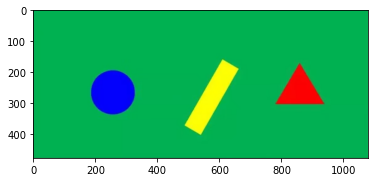

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread("Graph_detection.jpg",1)
#img=cv.imread("Graph_detection.jpg",0)
#cv.imshow("Graph",img)
#cv.waitKey(0)
plt.imshow(img[:,:,::-1])

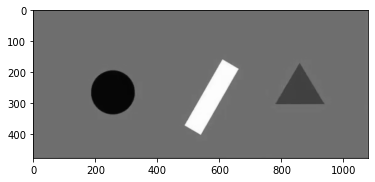

In [2]:
img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap = plt.cm.gray)

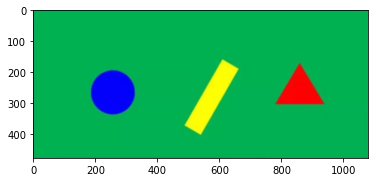

In [3]:
img_GaussianBlur=cv.GaussianBlur(img,(5, 5),0)
plt.imshow(img_GaussianBlur[:,:,::-1])

In [4]:
import numpy as np
color_dist={'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
            'blue': {'Lower': np.array([100, 80, 46]), 'Upper': np.array([124, 255, 255])},
            'green': {'Lower': np.array([35, 43, 35]), 'Upper': np.array([90, 255, 255])},
            }                                          #hsv色彩空间中颜色范围（不受亮度变化影响）
img_HSV=cv.cvtColor(img_GaussianBlur, cv.COLOR_BGR2HSV) #转换hsv色彩空间
img_Erosion=cv.erode(img_HSV, None, iterations=2)      #腐蚀
inRange_hsv=cv.inRange(img_Erosion,color_dist["green"]['Lower'], color_dist["green"]['Upper']) #把绿色区域部分设置成白色，其他设置成黑色
#cv.imshow("Graph_hsv",inRange_hsv)
#cv.waitKey(0)

In [5]:
img_contours, img_hierarchy=cv.findContours(inRange_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(np.size(img_contours))  #   得到该图中总的轮廓数量
print(img_hierarchy) #打印出相应轮廓之间的关系

4
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]


E:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [6]:
img_copy = img.copy()
img_edge = cv.drawContours(img_copy,img_contours, -1, (0,0,0), 10, lineType=cv.LINE_AA)
cv.imshow("Graph_lunkuo", img_edge)
cv.waitKey(0)

-1

In [7]:
for cnt in range(len(img_contours)):  #分别检测这几个图形形状
    epsilon = 0.02 * cv.arcLength(img_contours[cnt], True) #多边形拟合的距离参数，下一个函数要用到
    approx = cv.approxPolyDP(img_contours[cnt],epsilon, True)  # 计算逼近多边形的顶点坐标
    corners = len(approx) #得到角点数量
    print(corners)
    if corners == 3: #三个角点的就是三角形
        mu = cv.moments(img_contours[cnt])  #contour是一个轮廓，用于求解图像的矩
        cx = mu['m10'] / mu['m00']  #轮廓contour的质心的横坐标
        cy = mu['m01'] / mu['m00']  #轮廓contour的质心的纵坐标
        print("三角形cx=", cx)
        print("三角形cy=", cy)
    elif corners == 4: #四个角点就是矩形
        mu = cv.moments(img_contours[cnt])  #contour是一个轮廓，用于求解图像的矩
        cx = mu['m10'] / mu['m00']  #轮廓contour的质心的横坐标
        cy = mu['m01'] / mu['m00']  #轮廓contour的质心的纵坐标
        print("矩形cx=", cx);print("矩形cy=", cy)
        rect = cv.minAreaRect(img_contours[cnt])
        print("矩形的中心坐标：", rect[0])
        
    else: #圆有好多角点
        mu = cv.moments(img_contours[cnt])  #contour是一个轮廓，用于求解图像的矩
        cx = mu['m10'] / mu['m00']  #轮廓contour的质心的横坐标
        cy = mu['m01'] / mu['m00']  #轮廓contour的质心的纵坐标
        print("圆cx=", cx);print("圆cy=", cy)
        img_gray_copy=img.copy()
        img_gray_gray=cv.cvtColor(img_gray_copy, cv.COLOR_BGR2GRAY)
        circle = cv.HoughCircles(img_gray_gray, cv.HOUGH_GRADIENT,1,400,param1=50,param2=30,minRadius=0,maxRadius=0)
        print("圆心坐标和半径",circle)
    cv.circle(img, (int(cx), int(cy)), 5, (0, 140, 255), -1)
cv.imshow("Graph_center",img)
cv.waitKey(0)

#img_copy1=img.copy()
#h,w,c=img_copy1.shape
#print("原图像的高h=",h)
#print("原图像的宽w=",w)
#print("原图像的通道c=",c)
#img_edge1=cv.drawContours(img_copy1,img_contours[3],-1,(0,0,0),10,lineType=cv.LINE_AA)
#cv.imshow("Graph_lunkuo",img_edge1)
#cv.waitKey(0)

4
矩形cx= 539.5
矩形cy= 237.5
矩形的中心坐标： (539.5, 237.49996948242188)
8
圆cx= 257.17576477640057
圆cy= 264.4783679061503
圆心坐标和半径 [[[256.5 263.5  70.1]]]
3
三角形cx= 859.6562748812562
三角形cy= 257.39851192927546
4
矩形cx= 575.4655024993423
矩形cy= 279.6262496711392
矩形的中心坐标： (575.4775390625, 279.4505310058594)


-1

# 完整版python代码

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread("Graph_detection.jpg",1)
img_GaussianBlur=cv.GaussianBlur(img,(5, 5),0)
import numpy as np
color_dist={'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
            'blue': {'Lower': np.array([100, 80, 46]), 'Upper': np.array([124, 255, 255])},
            'green': {'Lower': np.array([35, 43, 35]), 'Upper': np.array([90, 255, 255])},
            }                                          #hsv色彩空间中颜色范围（不受亮度变化影响）
img_HSV=cv.cvtColor(img_GaussianBlur, cv.COLOR_BGR2HSV) #转换hsv色彩空间
img_Erosion=cv.erode(img_HSV, None, iterations=2)      #腐蚀
inRange_hsv=cv.inRange(img_Erosion,color_dist["green"]['Lower'], color_dist["green"]['Upper']) #把绿色区域部分设置成白色，其他设置成黑色
img_contours, img_hierarchy=cv.findContours(inRange_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(np.size(img_contours))  #   得到该图中总的轮廓数量
print(img_hierarchy) #打印出相应轮廓之间的关系
img_copy = img.copy()
img_edge = cv.drawContours(img_copy,img_contours, -1, (0,0,0), 10, lineType=cv.LINE_AA)
for cnt in range(len(img_contours)):  #分别检测这几个图形形状
    epsilon = 0.02 * cv.arcLength(img_contours[cnt], True) #多边形拟合的距离参数，下一个函数要用到
    approx = cv.approxPolyDP(img_contours[cnt],epsilon, True)  # 计算逼近多边形的顶点坐标
    corners = len(approx) #得到角点数量
    print(corners)
    if corners == 3: #三个角点的就是三角形
        mu = cv.moments(img_contours[cnt])  #contour是一个轮廓，用于求解图像的矩
        cx = mu['m10'] / mu['m00']  #轮廓contour的质心的横坐标
        cy = mu['m01'] / mu['m00']  #轮廓contour的质心的纵坐标
        print("三角形cx=", cx)
        print("三角形cy=", cy)
    elif corners == 4: #四个角点就是矩形
        mu = cv.moments(img_contours[cnt])  #contour是一个轮廓，用于求解图像的矩
        cx = mu['m10'] / mu['m00']  #轮廓contour的质心的横坐标
        cy = mu['m01'] / mu['m00']  #轮廓contour的质心的纵坐标
        print("矩形cx=", cx);print("矩形cy=", cy)
        rect = cv.minAreaRect(img_contours[cnt])
        print("矩形的中心坐标：", rect[0])
        
    else: #圆有好多角点
        mu = cv.moments(img_contours[cnt])  #contour是一个轮廓，用于求解图像的矩
        cx = mu['m10'] / mu['m00']  #轮廓contour的质心的横坐标
        cy = mu['m01'] / mu['m00']  #轮廓contour的质心的纵坐标
        print("圆cx=", cx);print("圆cy=", cy)
        img_gray_copy=img.copy()
        img_gray_gray=cv.cvtColor(img_gray_copy, cv.COLOR_BGR2GRAY)
        circle = cv.HoughCircles(img_gray_gray, cv.HOUGH_GRADIENT,1,400,param1=50,param2=30,minRadius=0,maxRadius=0)
        print("圆心坐标和半径",circle)
    cv.circle(img, (int(cx), int(cy)), 5, (0, 140, 255), -1)
cv.imshow("Graph_center",img)
cv.waitKey(0)

4
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]
4
矩形cx= 539.5
矩形cy= 237.5
矩形的中心坐标： (539.5, 237.49996948242188)
8
圆cx= 257.17576477640057
圆cy= 264.4783679061503
圆心坐标和半径 [[[256.5 263.5  70.1]]]
3
三角形cx= 859.6562748812562
三角形cy= 257.39851192927546
4
矩形cx= 575.4655024993423
矩形cy= 279.6262496711392
矩形的中心坐标： (575.4775390625, 279.4505310058594)


-1

# 符合要求的C++代码

In [9]:
#include <opencv2/opencv.hpp>
#include <vector>
#include <iostream>

class Detector {
private:
    cv::Mat _img;
    std::vector<cv::Point> _points;

public:
    void set_img(cv::Mat &img) {
        _img = img;
    }

    std::vector<cv::Point> detect() {
        cv::Mat img_GaussianBlur;
        cv::GaussianBlur(_img, img_GaussianBlur, cv::Size(5, 5), 0);

        std::map<std::string, cv::Scalar> color_dist = {
            {"red", cv::Scalar(0, 60, 60)},
            {"blue", cv::Scalar(100, 80, 46)},
            {"green", cv::Scalar(35, 43, 35)}
        };

        cv::Mat img_HSV;
        cv::cvtColor(img_GaussianBlur, img_HSV, cv::COLOR_BGR2HSV);

        cv::Mat img_Erosion;
        cv::erode(img_HSV, img_Erosion, cv::Mat(), cv::Point(-1, -1), 2);

        cv::Mat inRange_hsv;
        cv::inRange(img_Erosion, color_dist["green"]["Lower"], color_dist["green"]["Upper"], inRange_hsv);

        std::vector<std::vector<cv::Point>> img_contours;
        std::vector<cv::Vec4i> img_hierarchy;
        cv::findContours(inRange_hsv, img_contours, img_hierarchy, cv::RETR_TREE, cv::CHAIN_APPROX_SIMPLE);

        std::cout << "Total contours: " << img_contours.size() << std::endl;

        for (size_t cnt = 0; cnt < img_contours.size(); ++cnt) {
            double epsilon = 0.02 * cv::arcLength(img_contours[cnt], true);
            std::vector<cv::Point> approx;
            cv::approxPolyDP(img_contours[cnt], approx, epsilon, true);
            int corners = approx.size();

            if (corners == 3) {
                cv::Moments mu = cv::moments(img_contours[cnt]);
                double cx = mu.m10 / mu.m00;
                double cy = mu.m01 / mu.m00;
                _points.push_back(cv::Point(cx, cy));
            } else if (corners == 4) {
                cv::Moments mu = cv::moments(img_contours[cnt]);
                double cx = mu.m10 / mu.m00;
                double cy = mu.m01 / mu.m00;
                _points.push_back(cv::Point(cx, cy));
            } else {
                cv::Moments mu = cv::moments(img_contours[cnt]);
                double cx = mu.m10 / mu.m00;
                double cy = mu.m01 / mu.m00;
                _points.push_back(cv::Point(cx, cy));
            }
        }

        return _points;
    }

    void print() {
        for (const cv::Point &point : _points) {
            std::cout << "Point: (" << point.x << ", " << point.y << ")" << std::endl;
        }
    }
};

int main() {
    cv::Mat image = cv::imread("Graph_detection.jpg", 1);

    if (image.empty()) {
        std::cerr << "Error: Unable to load image." << std::endl;
        return -1;
    }

    Detector detector;
    detector.set_img(image);
    std::vector<cv::Point> detected_points = detector.detect();
    detector.print();

    return 0;
}


SyntaxError: invalid syntax (552835218.py, line 5)